# About the data


### The Radiological Society of North America (RSNA®) has teamed up with the Society of Thoracic Radiology (STR) has generously provided us with the dataset. This is an on-going kaggle competition with one month to go. We will try and classify pulmonary embolism.

### A pulmonary embolism (PE) is caused by an artery blockage in the lung. Symptoms include pain can occur in the chest while breathing, light-headedness due to lack oxygen, fast heart rate or palpitations, fast breathing or shortness of breath. Computed Tomography

### Pulmonary Angiography (CTPA) is the one of most common type of medical imaging technology which is used to evaluate patients with suspected Pulmonary Embolism. Computed Tomography Pulmonary Angiography (CTPA) scans contain all data in with these regards. The

### features in complex DICOM format which is the leading standard for medical imaging. It is difficult to predict these occurrences accurately without the help of machine learning models. We are predicting the labels as following: QA Contrast, QA Motion, True,

### and Flow, Acute PE, Chronic PE and/or Acute and Chronic PE, RL/LV ratio. 

# Motivation

### With the increase in number of cases of chest and lung diseases; due to the novel coronavirus 2019 (covid-19) and rising air pollution levels; we have decided to tackle this challenge of classification of Pulmonary Embolism (PE); which is traditionally very prone to over-diagnosis. Seeing that PE has a Mortality Rate of ~10% and Recurrence rate of ~20% (i.e. 1 in 5 cases), with 60,000-100,000 PE deaths annually in the US, it is among the most fatal cardiovascular diseases. We have identified this as a critical issue that needs innovation and will save lives. This is even more crucial, since due to the novel coronavirus 2019, there is a shortage of medical staff, hospital beds and other infrastructure. In such challenging times, it is very important that misdiagnosis of PE is avoided. Currently diagnosis of PE is done via a CTPA (CT pulmonary angiography); this involves hundreds of CT scan images that require time-intensive detailed review by medical professionals to identify PE. Using ML (Machine Learning) and DL (Deep Learning), we are looking into optimizing this process, free up crucial time of medical professionals, and avoid human error related to over-diagnosis of PE.


## Notebook

### This is the first draft towards understanding the data

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os

In [ ]:
base_path = '/kaggle/input/rsna-str-pulmonary-embolism-detection/'

In [ ]:
df_train = pd.read_csv('/kaggle/input/rsna-str-pulmonary-embolism-detection/train.csv')

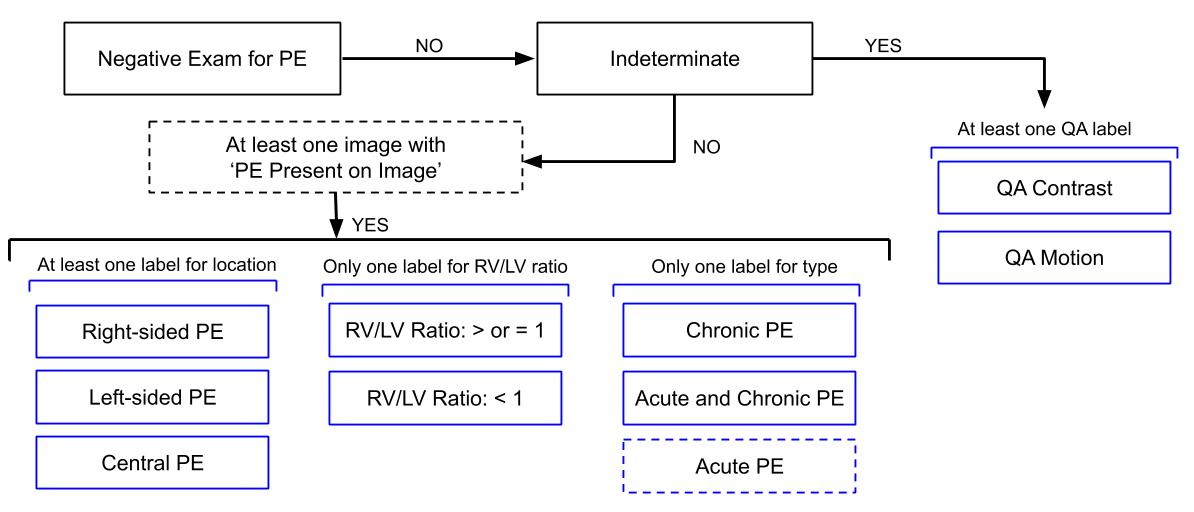

In [ ]:
df_train.head()

In [ ]:
df_train.info()

In [ ]:
df_train['qa_motion'].unique()

In [ ]:
df_train['qa_contrast'].unique()

In [ ]:
df_train['qa_motion_contrast']=df_train['qa_motion']+df_train['qa_contrast']
df_train['qa_motion_contrast'].unique()

In [ ]:
# k = df_train['qa_motion_contrast']
# df_train[k==0]
# df_train[k==1]
# df_train[k==2]

In [ ]:
df_train['negative_exam_for_pe'].describe()
df_train['negative_exam_for_pe'].unique()

In [ ]:
len(df_train.StudyInstanceUID.unique()),len(df_train)
len(df_train.SeriesInstanceUID.unique()),len(df_train)
len(df_train.SOPInstanceUID.unique()),len(df_train)

In [ ]:
import os
training_files = os.listdir(base_path+'train')
training_files.index('6897fa9de148')
len(training_files)

In [ ]:
df_train[df_train['StudyInstanceUID']=='6897fa9de148']

In [ ]:
series_instances = base_path + 'train/6897fa9de148'
os.listdir(series_instances)

In [ ]:
study_instances = base_path + 'train/6897fa9de148' + '/' + '2bfbb7fd2e8b'
len(os.listdir(study_instances))

In [ ]:
# pd.set_option('display.max_columns', None)  # or 1000
# pd.set_option('display.max_rows', None)  # or 1000
# pd.set_option('display.max_colwidth', -1)  # or 199


In [ ]:
sample_submission = pd.read_csv(base_path + 'sample_submission.csv')
# sample_submission = sample_submission.sort_values('id')
sample_submission.tail(10)
sample_submission.head(10)

In [ ]:
sample_submission[sample_submission.id.str.contains('df06fad17bc3', regex= True, na=False)]
sample_submission[sample_submission.id.str.contains('41cb110f177e', regex= True, na=False)]

In [ ]:
sample_submission[sample_submission.id.str.contains('4f6f2387f9ba', regex= True, na=False)]

In [ ]:
sample_submission[sample_submission.id.str.contains('012c12fe09c3', regex= True, na=False)]

In [ ]:
%matplotlib inline
import pydicom
data=pydicom.dcmread('../input/rsna-str-pulmonary-embolism-detection/test/00268ff88746/75d23269adbd/012c12fe09c3.dcm')
data

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(data.pixel_array, cmap=plt.cm.bone)
# pltshow()ss